# Initial analysis of the SDWIS database

Let's open up the various tables in the SDWIS database and try and get a basic understanding of our data. For this to work you will need to download the swdis.zip file (it's pinned to the #water slack channel) and update the `DATABASE_DIR` variable below to reflect where you have downloaded the data to.

In [34]:
import os
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Update this variable to the location where you downloaded the SWDIS data to
DATABASE_DIR = "C:\\Users\\Ewan\\Documents\\CodeForBoston\\SafeWater\\data\\swdis\\"

In [35]:
# Allow us to display all the columns in a dataframe
pd.options.display.max_columns = None

In [36]:
# Read in the data from the VIOLATION CSV file
def read_in_dataframes(root_dir):
    """Read in the SDWIS tables into dataframes and save them in a dictionary"""
    tables = ['ENFORCEMENT_ACTION',
              'GEOGRAPHIC_AREA',
              'LCR_SAMPLE',
              'LCR_SAMPLE_RESULT',
              'SERVICE_AREA',
              'TREATMENT',
              'VIOLATION',
              'VIOLATION_ENF_ASSOC',
              'WATER_SYSTEM',
              'WATER_SYSTEM_FACILITY']
    df = {}
    for table in tables:
        df[table] = pd.read_csv("{0}{1}{2}.csv".format(root_dir, os.path.sep, table),
                                index_col=False,
                                error_bad_lines=False)
    
    return df

df = read_in_dataframes(DATABASE_DIR)
viol_df = df['VIOLATION']

b'Skipping line 2780: expected 7 fields, saw 8\nSkipping line 4943: expected 7 fields, saw 8\nSkipping line 6784: expected 7 fields, saw 8\nSkipping line 7030: expected 7 fields, saw 8\nSkipping line 9079: expected 7 fields, saw 8\nSkipping line 11087: expected 7 fields, saw 8\nSkipping line 12463: expected 7 fields, saw 8\nSkipping line 21912: expected 7 fields, saw 11\nSkipping line 25245: expected 7 fields, saw 8\nSkipping line 25462: expected 7 fields, saw 9\nSkipping line 25610: expected 7 fields, saw 8\nSkipping line 25790: expected 7 fields, saw 8\nSkipping line 26205: expected 7 fields, saw 8\nSkipping line 27561: expected 7 fields, saw 14\nSkipping line 28035: expected 7 fields, saw 8\nSkipping line 32665: expected 7 fields, saw 11\nSkipping line 35567: expected 7 fields, saw 9\nSkipping line 35568: expected 7 fields, saw 13\nSkipping line 35585: expected 7 fields, saw 10\nSkipping line 35640: expected 7 fields, saw 13\nSkipping line 35648: expected 7 fields, saw 9\nSkipping l

b'Skipping line 1151188: expected 7 fields, saw 9\nSkipping line 1178609: expected 7 fields, saw 8\nSkipping line 1178623: expected 7 fields, saw 8\nSkipping line 1178675: expected 7 fields, saw 11\n'
b'Skipping line 1184796: expected 7 fields, saw 11\nSkipping line 1195050: expected 7 fields, saw 9\nSkipping line 1219169: expected 7 fields, saw 17\nSkipping line 1224766: expected 7 fields, saw 9\nSkipping line 1270641: expected 7 fields, saw 14\nSkipping line 1270897: expected 7 fields, saw 8\nSkipping line 1270961: expected 7 fields, saw 8\nSkipping line 1271254: expected 7 fields, saw 8\nSkipping line 1271941: expected 7 fields, saw 8\nSkipping line 1272263: expected 7 fields, saw 10\nSkipping line 1273002: expected 7 fields, saw 8\nSkipping line 1273017: expected 7 fields, saw 8\nSkipping line 1274018: expected 7 fields, saw 8\nSkipping line 1274019: expected 7 fields, saw 8\nSkipping line 1274707: expected 7 fields, saw 9\nSkipping line 1274939: expected 7 fields, saw 8\nSkipping 

b'Skipping line 1183545: expected 22 fields, saw 23\n'
C:\Users\Ewan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (4,7,18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [53]:
water_system_df = df['WATER_SYSTEM']
enforce_df = df['ENFORCEMENT_ACTION']
viol_enf_assoc_df = df['VIOLATION_ENF_ASSOC']

We've now read in the data and we have the VIOLATION table saved into the `viol_df` variable. Let's do a quick summary of it.

In [37]:
display(viol_df.shape)
display(viol_df.head())

(2369432, 33)

,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
0,R,01-JAN-16,31-DEC-16,2037,NaN,1,1,N,Y,0106001OX08031722932,R,39552,4,1,GU,3,10106001,A,NaN,CWS,03-AUG-17,0106001OX08031722932,320,320,300,NaN,NaN,NaN,NaN,MR,03,010600103203712016,NaN
1,R,01-JAN-16,31-DEC-16,2040,NaN,1,1,N,Y,0106001OX08031722931,R,39552,4,1,GU,3,10106001,A,NaN,CWS,03-AUG-17,0106001OX08031722931,320,320,300,NaN,NaN,NaN,NaN,MR,03,010600103204012016,NaN
2,R,01-JAN-16,31-DEC-16,2036,NaN,1,1,N,Y,0106001OX08031722930,R,39552,4,1,GU,3,10106001,A,NaN,CWS,03-AUG-17,0106001OX08031722930,320,320,300,NaN,NaN,NaN,NaN,MR,03,010600103203612016,NaN
3,R,01-JAN-16,31-DEC-16,2042,NaN,1,1,N,Y,0106001OX08031722929,R,39552,4,1,GU,3,10106001,A,NaN,CWS,03-AUG-17,0106001OX08031722929,320,320,300,NaN,NaN,NaN,NaN,MR,03,010600103204212016,NaN
4,R,01-JAN-16,31-DEC-16,2274,NaN,1,1,N,Y,0106001OX08031722928,R,39552,4,1,GU,3,10106001,A,NaN,CWS,03-AUG-17,0106001OX08031722928,320,320,300,NaN,NaN,NaN,NaN,MR,03,010600103227412016,NaN


So we have 2.37 million records!!

In [38]:
# Display a sample of 20 records
display(viol_df.sample(20))

,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
2081738,R,01-JAN-08,31-DEC-10,2039,NaN,8,3792,N,Y,122,S,70,1,UT,GW,3,UTAH14062,A,NaN,NTNCWS,28-SEP-15,119,320,320,300,NaN,NaN,NaN,NaN,MR,03,5026319,NaN
1749621,I,01-JUL-83,30-SEP-83,3000,NaN,3,NaN,N,Y,NaN,S,30,1,PA,GW,3,PA5040372,I,01-APR-14,TNCWS,01-APR-14,NaN,500,500,500,NaN,NaN,0.0,NaN,MR,03,8321566,0.0
345237,R,01-JAN-05,31-DEC-07,2968,NaN,8,9620,N,Y,3.70472e+06,S,452,1,CO,GW,3,CO0263003,A,NaN,NTNCWS,20-AUG-08,3.70472e+06,310,310,300,NaN,NaN,NaN,NaN,MR,03,2974313,NaN
247956,I,01-JUN-83,30-JUN-83,100,NaN,9,NaN,N,Y,NaN,S,0,1,CA,SW,3,CA1200504,N,09-JUN-09,CWS,09-JUN-09,NaN,500,500,500,NaN,NaN,0.0,NaN,MR,03,8344121,0.0
220493,R,01-JUL-15,NaN,7000,NaN,9,NaN,N,NaN,5224,S,3127,2,AZ,GW,3,AZ0413104,A,NaN,CWS,17-JUL-15,5224,420,420,400,NaN,NaN,NaN,NaN,Other,71,27267,NaN
377397,I,01-OCT-15,31-DEC-15,2076,NaN,1,57120,N,Y,282,S,38,1,CT,GW,3,CT0859071,N,05-MAR-15,CWS,05-MAR-15,NaN,500,500,500,NaN,NaN,NaN,NaN,MR,03,2300,NaN
779518,R,01-APR-13,30-APR-13,3100,NaN,7,NaN,N,NaN,1913,S,637,2,MO,GWP,3,MO4020601,A,NaN,CWS,22-JAN-14,1913,110,110,100,NaN,NaN,NaN,NaN,MR,23,919609,NaN
1223158,I,01-OCT-04,31-DEC-04,2996,NaN,2,12385,N,Y,NaN,S,70,1,NJ,GW,3,NJ1918345,I,31-OCT-09,NTNCWS,31-OCT-09,NaN,310,310,300,NaN,NaN,NaN,NaN,MR,03,7506,NaN
1007006,R,01-JAN-11,31-DEC-13,2969,NaN,8,15427,N,Y,4898417,S,300,1,MT,GW,3,MT0001791,A,NaN,CWS,30-OCT-13,4898417,310,310,300,NaN,NaN,NaN,NaN,MR,03,5510921,NaN
2178024,K,01-JAN-14,31-DEC-16,2274,NaN,10,7866,N,Y,NaN,S,62,1,WA,GW,3,WA5307143,A,NaN,NTNCWS,NaN,NaN,320,320,300,NaN,NaN,NaN,NaN,MR,03,16392872274,NaN


In [20]:
# Check how many unique values there are for each column
display(viol_df.nunique().sort_values())

IS_MAJOR_VIOL_IND                 2
IS_HEALTH_BASED_IND               2
PWS_TYPE_CODE                     3
PUBLIC_NOTIFICATION_TIER          3
COMPLIANCE_STATUS_CODE            4
PWS_ACTIVITY_CODE                 4
ORIGINATOR_CODE                   4
RULE_GROUP_CODE                   5
POP_CAT_5_CODE                    5
PRIMARY_SOURCE_CODE               6
VIOLATION_CATEGORY_CODE           7
EPA_REGION                       10
RULE_FAMILY_CODE                 16
UNIT_OF_MEASURE                  20
RULE_CODE                        21
SEVERITY_IND_CNT                 66
PRIMACY_AGENCY_CODE              67
STATE_MCL                       122
VIOLATION_CODE                  124
CONTAMINANT_CODE                500
COMPL_PER_END_DATE             4936
PWS_DEACTIVATION_DATE          5087
CORRECTIVE_ACTION_ID           5677
RTC_DATE                       8430
COMPL_PER_BEGIN_DATE           8664
POPULATION_SERVED_COUNT        8672
VIOL_MEASURE                  10532
SAMPLE_RESULT_ID            

In [39]:
# Check how many entries we have for each contaminant code and each violation code
display(viol_df.groupby('CONTAMINANT_CODE').count())
display(viol_df.groupby('VIOLATION_CODE').count())
display(viol_df.groupby(['IS_HEALTH_BASED_IND','VIOLATION_CATEGORY_CODE']).count())

,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
CONTAMINANT_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100.0,15980,15980,15980,0,15980,361,15980,10886,4775,15980,15980,15980,15980,15897,15980,15980,15980,13487,15980,15569,2153,15980,15980,15980,0,0,12648,119,15980,15980,15980,13872
200.0,26705,26705,25365,0,26705,2988,26705,18085,23018,26705,26705,26705,26705,26700,26705,26705,26705,8102,26705,24087,18158,26705,26705,26705,0,0,2089,0,26705,26705,26705,2089
300.0,11578,11578,11302,0,11578,1028,11578,7167,11085,11578,11578,11578,11578,11576,11578,11578,11578,1054,11578,10422,9949,11578,11578,11578,0,1026,0,0,11578,11578,11578,0
400.0,691,691,0,0,691,15,691,220,667,691,691,691,691,691,691,691,691,113,691,599,557,691,691,691,0,0,1,0,691,691,691,1
500.0,4,4,0,0,4,2,4,3,4,4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,0,0,0,0,4,4,4,0
600.0,1144,1144,1,0,1144,132,1144,592,1103,1144,1144,1144,1144,1144,1144,1144,1144,93,1144,944,898,1144,1144,1144,0,0,0,0,1144,1144,1144,0
700.0,14813,14813,10972,3129,14813,6184,14813,9256,14374,14813,14813,14813,14813,14811,14813,14813,14813,2022,14813,12949,12448,14813,14813,14813,0,0,0,0,14813,14813,14813,0
800.0,954,954,470,37,954,41,954,37,942,954,954,954,954,954,954,954,954,40,954,688,683,954,954,954,0,0,0,0,954,954,954,0
999.0,48134,48134,48134,0,48134,170,48134,48077,46822,48134,48134,48134,48134,48119,48134,48134,48134,5794,48134,45844,44922,48134,48134,48134,0,0,6,10,48134,48134,48134,10


,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_ID,VIOL_MEASURE
VIOLATION_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,949,949,949,949,0,949,433,949,0,928,949,949,949,949,941,949,949,949,77,949,869,851,949,949,949,0,0,828,939,949,949,949
2,4641,4641,4641,4641,0,4641,1032,4641,0,3835,4641,4641,4641,4641,4633,4641,4641,4641,1753,4641,3926,2481,4641,4641,4641,0,3,2776,3253,4641,4641,4640
3,74569,74569,74569,74569,0,74569,31915,74569,74528,69366,74569,74569,74569,74569,74479,74569,74569,74569,15223,74569,68588,62088,74569,74569,74569,0,0,1316,0,74569,74569,1316
4,136,136,136,136,0,136,48,136,136,133,136,136,136,136,136,136,136,136,42,136,131,120,136,136,136,0,0,0,0,136,136,0
5,208,208,179,100,0,208,0,208,0,205,208,208,208,208,207,208,208,208,47,208,197,169,208,208,208,0,0,0,0,208,208,0
6,80,80,80,60,0,80,0,80,0,46,80,80,80,80,80,80,80,80,54,80,80,33,80,80,80,0,0,27,0,80,80,27
7,264,264,264,0,0,264,0,264,0,261,264,264,264,264,264,264,264,264,62,264,261,232,264,264,264,0,0,0,0,264,264,0
8,2,2,2,0,0,2,0,2,0,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,0,0,0,0,2,2,0
9,737,737,646,0,0,737,0,737,0,726,737,737,737,737,735,737,737,737,153,737,668,632,737,737,737,0,0,0,0,737,737,0


COMPLIANCE_STATUS_CODE  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                           
N                   MON                                       43752   
                    MR                                      1764874   
                    Other                                    290498   
                    RPT                                        6328   
Y                   MCL                                      224328   
                    MRDL                                        124   
                    TT                                        39528   

                                             COMPL_PER_BEGIN_DATE  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                         
N                   MON                                     43752   
                    MR                                    1764874   
                    Other                                  290498   
                    RPT                                      6328   
Y                   MCL                                    224328   
                    MRDL                                      124   
                    TT                                      39528   

                                             COMPL_PER_END_DATE  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                       
N                   MON                                   43752   
                    MR                                  1664808   
                    Other                                 56515   
                    RPT                                       0   
Y                   MCL                                  224328   
                    MRDL                                    124   
                    TT                                    19024   

                                             CONTAMINANT_CODE  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                     
N                   MON                                 43752   
                    MR                                1764874   
                    Other                              237471   
                    RPT                                  6328   
Y                   MCL                                224328   
                    MRDL                                  124   
                    TT                                  39528   

                                             CORRECTIVE_ACTION_ID  EPA_REGION  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                                     
N                   MON                                         0       43752   
                    MR                                          0     1764874   
                    Other                                       0      290498   
                    RPT                                         0        6328   
Y                   MCL                                         0      224328   
                    MRDL                                        0         124   
                    TT                                       5729       39528   

                                             FACILITY_ID  IS_MAJOR_VIOL_IND  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                                   
N                   MON                              618              43749   
                    MR                            837689            1311866   
                    Other                          28648                349   
                    RPT                              175                  0   
Y                   MCL                            70810                  0   
                    MRDL                              13                  0   
                    TT                              2686                  1   

                                             LATEST_ENFORCEMENT_ID  \
IS_HEALTH_BASED_IND VIOLATION_CATEGORY_CODE                          
N          

So there are seven VIOLATION_CATEGORY_CODEs. And it looks like MON, MR, Other and RPT are not health based violations whereas MCL, MRDL and TT are health based violations. So maybe we should be most concerned about predicting those health based violations.

In [26]:
null_health_based_ind = np.sum(viol_df.IS_HEALTH_BASED_IND.isnull())
null_major_viol_ind = np.sum(viol_df.IS_MAJOR_VIOL_IND.isnull())
print("There are {0} records with IS_HEALTH_BASED_IND unspecified "
      "and {1} records with IS_MAJOR_VIOL_IND unspecified".format(null_health_based_ind, null_major_viol_ind))

There are 0 records with IS_HEALTH_BASED_IND unspecified and 1013467 records with IS_MAJOR_VIOL_IND unspecified


In [33]:
viol_df.IS_MAJOR_VIOL_IND.fillna('UNSPECIFIED', inplace=True)
display(viol_df.groupby(['IS_MAJOR_VIOL_IND', 'VIOLATION_CATEGORY_CODE']).count())
display(viol_df.groupby(['IS_MAJOR_VIOL_IND', 'IS_HEALTH_BASED_IND']).count())

COMPLIANCE_STATUS_CODE  \
IS_MAJOR_VIOL_IND VIOLATION_CATEGORY_CODE                           
N                 MON                                        2095   
                  MR                                        81673   
                  Other                                        65   
UNSPECIFIED       MCL                                      224328   
                  MON                                           3   
                  MR                                       453008   
                  MRDL                                        124   
                  Other                                    290149   
                  RPT                                        6328   
                  TT                                        39527   
Y                 MON                                       41654   
                  MR                                      1230193   
                  Other                                       284   
                  TT                                            1   

                                           COMPL_PER_BEGIN_DATE  \
IS_MAJOR_VIOL_IND VIOLATION_CATEGORY_CODE                         
N                 MON                                      2095   
                  MR                                      81673   
                  Other                                      65   
UNSPECIFIED       MCL                                    224328   
                  MON                                         3   
                  MR                                     453008   
                  MRDL                                      124   
                  Other                                  290149   
                  RPT                                      6328   
                  TT                                      39527   
Y                 MON                                     41654   
                  MR                                    1230193   
                  Other                                     284   
                  TT                                          1   

                                           COMPL_PER_END_DATE  \
IS_MAJOR_VIOL_IND VIOLATION_CATEGORY_CODE                       
N                 MON                                    2095   
                  MR                                    80100   
                  Other                                    12   
UNSPECIFIED       MCL                                  224328   
                  MON                                       3   
                  MR                                   369783   
                  MRDL                                    124   
                  Other                                 56445   
                  RPT                                       0   
                  TT                                    19023   
Y                 MON                                   41654   
                  MR                                  1214925   
                  Other                                    58   
                  TT                                        1   

                                           CONTAMINANT_CODE  \
IS_MAJOR_VIOL_IND VIOLATION_CATEGORY_CODE                     
N                 MON                                  2095   
                  MR                                  81673   
                  Other                                  54   
UNSPECIFIED       MCL                                224328   
                  MON                                     3   
                  MR                                 453008   
                  MRDL                                  124   
                  Other                              237133   
                  RPT                                  6328   
                  TT                                  39527   
Y                 MON                                 41654   
     

COMPLIANCE_STATUS_CODE  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                           
N                 N                                     83833   
UNSPECIFIED       N                                    749488   
                  Y                                    263979   
Y                 N                                   1272131   
                  Y                                         1   

                                       COMPL_PER_BEGIN_DATE  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                         
N                 N                                   83833   
UNSPECIFIED       N                                  749488   
                  Y                                  263979   
Y                 N                                 1272131   
                  Y                                       1   

                                       COMPL_PER_END_DATE  CONTAMINANT_CODE  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                                         
N                 N                                 82207             83822   
UNSPECIFIED       N                                426231            696472   
                  Y                                243475            263979   
Y                 N                               1256637           1272131   
                  Y                                     1                 1   

                                       CORRECTIVE_ACTION_ID  EPA_REGION  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                                     
N                 N                                       0       83833   
UNSPECIFIED       N                                       0      749488   
                  Y                                    5729      263979   
Y                 N                                       0     1272131   
                  Y                                       0           1   

                                       FACILITY_ID  LATEST_ENFORCEMENT_ID  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                                       
N                 N                          21276                  77935   
UNSPECIFIED       N                          35567                 677472   
                  Y                          73509                 246233   
Y                 N                         810287                1142485   
                  Y                              0                      1   

                                       ORIGINATOR_CODE  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                    
N                 N                              83833   
UNSPECIFIED       N                             749488   
                  Y                             263979   
Y                 N                            1272131   
                  Y                                  1   

                                       POPULATION_SERVED_COUNT  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                            
N                 N                                      83833   
UNSPECIFIED       N                                     749488   
                  Y                                     263979   
Y                 N                                    1272131   
                  Y                                          1   

                                       POP_CAT_5_CODE  PRIMACY_AGENCY_CODE  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND                                        
N                 N                             83833                83833   
UNSPECIFIED       N                            749488               749488   
                  Y                            263979               263979   
Y                 N                           1272131              1272131   
                  Y                                 1                    1   

                                       PRIMARY_SOURCE_CODE  \
IS_MAJOR_VIOL_IND IS_HEALTH_BASED_IND     

,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
PWSID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WV3305536,4285,4285,3842,4285,0,4285,2206,4285,3647,4269,4285,4285,4285,4285,4285,4285,4285,4285,4285,4285,86,4285,4285,4285,0,32,19,0,4285,4285,4285,19
WV3301040,3363,3363,2934,3363,0,3363,2520,3363,2874,3327,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,25,3363,3363,3363,0,14,58,0,3363,3363,3363,58
PA2400148,3154,3154,2122,3154,0,3154,2897,3154,2009,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,3154,0,0,0,0,3154,3154,3154,0
WV3301304,2791,2791,2678,2731,0,2791,722,2791,2413,2788,2791,2791,2791,2791,2791,2791,2791,2791,2791,2791,1661,2791,2791,2791,0,0,817,1,2791,2791,2791,818
CT0859071,2756,2756,2713,2756,0,2756,2632,2756,2649,2619,2756,2756,2756,2756,2756,2756,2756,2756,2756,2756,1501,2756,2756,2756,0,0,0,0,2756,2756,2756,0
WV3302476,2480,2480,2152,2480,0,2480,1875,2480,1999,2480,2480,2480,2480,2480,2480,2480,2480,2480,2480,2480,0,2480,2480,2480,0,6,0,0,2480,2480,2480,0
WV3305535,2469,2469,2014,2469,0,2469,1730,2469,1925,2422,2469,2469,2469,2469,2469,2469,2469,0,2469,34,34,2469,2469,2469,0,40,4,0,2469,2469,2469,4
WA5340950,2376,2376,2376,2376,0,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,0,2376,2376,2376,2376,2376,2376,0,0,0,0,2376,2376,2376,0
WV3302451,2324,2324,1946,2324,0,2324,1731,2324,1893,2277,2324,2324,2324,2324,2324,2324,2324,0,2324,27,27,2324,2324,2324,0,10,1,0,2324,2324,2324,1


Text(0.5,1,'Number of violations for the top 100 offending water systems')

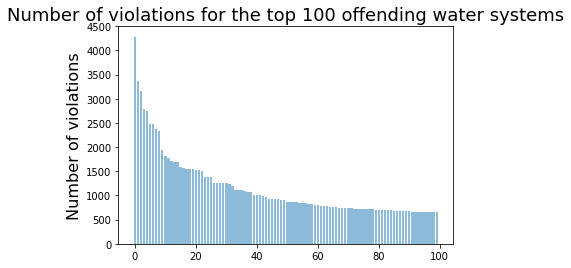

In [42]:
# Let's get information about the 100 water systems with the most violations
top_100_offenders = viol_df.groupby('PWSID').count().sort_values(by='COMPLIANCE_STATUS_CODE', ascending=False).head(100)
display(top_100_offenders)
labels = top_100_offenders.index
y_vals = top_100_offenders['COMPLIANCE_STATUS_CODE']
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.bar(y_pos, y_vals, align='center', alpha=0.5)
ax.set_ylabel('Number of violations', fontsize=16)
ax.set_title('Number of violations for the top 100 offending water systems', fontsize=18)


,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
PWSID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TX1520005,367,367,367,367,0,367,362,367,0,367,367,367,367,367,367,367,367,0,367,363,363,367,367,367,0,0,333,366,367,367,367,367
TX1540001,356,356,356,356,0,356,350,356,0,356,356,356,356,356,356,356,356,0,356,45,45,356,356,356,0,0,326,351,356,356,356,351
WI2680238,237,237,237,237,0,237,237,237,0,234,237,237,237,237,237,237,237,0,237,7,7,237,237,237,0,0,237,237,237,237,237,237
OK1010809,182,182,182,182,0,182,138,182,0,182,182,182,182,182,182,182,182,0,182,95,95,182,182,182,0,87,151,109,182,182,182,156
PR0478054,170,170,167,170,0,170,0,170,0,162,170,170,170,170,170,170,170,170,170,170,0,170,170,170,0,0,12,0,170,170,170,93
TX0830001,165,165,165,165,0,165,162,165,0,165,165,165,165,165,165,165,165,0,165,21,21,165,165,165,0,0,138,165,165,165,165,165
PR0005527,162,162,162,162,0,162,0,162,0,47,162,162,162,162,162,162,162,162,162,162,0,162,162,162,0,0,3,0,162,162,162,76
TX1870105,160,160,160,160,0,160,158,160,0,154,160,160,160,160,160,160,160,0,160,20,20,160,160,160,0,0,137,160,160,160,160,160
TX1520080,156,156,156,156,0,156,154,156,0,156,156,156,156,156,156,156,156,0,156,4,4,156,156,156,0,0,154,154,156,156,156,154


Text(0.5,0,'Offending water systems')

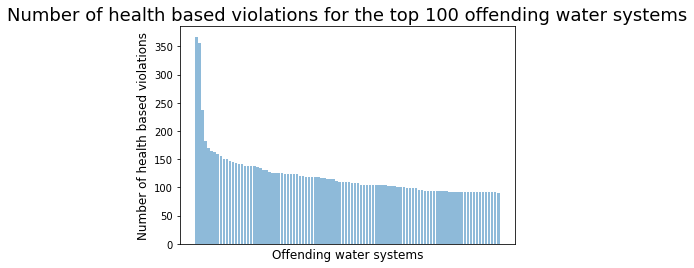

In [52]:
# And let's do the same for the 100 water systems with the most health based violations
health_based_violations = viol_df[viol_df['IS_HEALTH_BASED_IND'] == 'Y']
health_based_violations.head()
type(health_based_violations)
top_100_health_offenders = health_based_violations.groupby('PWSID').count().sort_values(by='COMPLIANCE_STATUS_CODE', ascending=False).head(100)
display(top_100_health_offenders)
labels = top_100_health_offenders.index
y_vals = top_100_health_offenders['COMPLIANCE_STATUS_CODE']
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.bar(y_pos, y_vals, align='center', alpha=0.5)
ax.set_ylabel('Number of health based violations', fontsize=12)
ax.set_title('Number of health based violations for the top 100 offending water systems', fontsize=18)
ax.set_xticks([])
ax.set_xlabel('Offending water systems', fontsize=12)

Let's investigate the water system with the most violations of all. Pierpoint water in West Virginia. You might find this [news article](http://www.wvpublic.org/post/drinking-water-abandoned-mine-really#stream/0) interesting!

In [64]:
# Get some information about the system with the most violations
#most_viol_sys_id = 'WV3305536'
most_viol_sys_id = 'TX1520005'
most_viol_sys = viol_df.loc[viol_df['PWSID'] == most_viol_sys_id]
display(most_viol_sys.groupby('VIOLATION_CATEGORY_CODE').count())
display(most_viol_sys.groupby('VIOLATION_CODE').count())
display(most_viol_sys.groupby('CONTAMINANT_CODE').count())
display(most_viol_sys[most_viol_sys['IS_HEALTH_BASED_IND'] == 'Y'])

display(water_system_df.loc[water_system_df['PWSID'] == most_viol_sys_id])

,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
VIOLATION_CATEGORY_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MCL,367,367,367,367,0,367,362,367,0,367,367,367,367,367,367,367,367,367,0,367,363,363,367,367,367,0,0,333,366,367,367,367
MR,74,74,73,74,0,74,68,74,73,74,74,74,74,74,74,74,74,74,0,74,74,74,74,74,74,0,0,0,0,74,74,0
Other,53,53,0,53,0,53,0,53,0,53,53,53,53,53,53,53,53,53,0,53,53,53,53,53,53,0,0,0,0,53,53,0


,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_ID,VIOL_MEASURE
VIOLATION_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1
02,366,366,366,366,0,366,361,366,0,366,366,366,366,366,366,366,366,366,0,366,362,362,366,366,366,0,0,333,365,366,366,366
03,68,68,68,68,0,68,68,68,68,68,68,68,68,68,68,68,68,68,0,68,68,68,68,68,68,0,0,0,0,68,68,0
27,5,5,5,5,0,5,0,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,0,0,0,0,5,5,0
66,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,0
75,53,53,0,53,0,53,0,53,0,53,53,53,53,53,53,53,53,53,0,53,53,53,53,53,53,0,0,0,0,53,53,0


,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
CONTAMINANT_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
999.0,5,5,5,0,5,0,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,0,0,0,0,5,5,5,0
1002.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0
1005.0,180,180,180,0,180,178,180,7,180,180,180,180,180,180,180,180,180,0,180,178,178,180,180,180,0,0,153,173,180,180,180,173
1010.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0
1015.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0
1017.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0
1020.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0
1022.0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0
1025.0,198,198,198,0,198,195,198,7,198,198,198,198,198,198,198,198,198,0,198,196,196,198,198,198,0,0,178,190,198,198,198,191


,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
1996100,R,01-APR-12,30-JUN-12,1025,NaN,6,55613,Y,NaN,970026961,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026961,333,330,300,NaN,NaN,4.00,MG/L,MCL,02,100069402,5.300000
1996101,R,01-APR-12,30-JUN-12,1025,NaN,6,55604,Y,NaN,970026956,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026956,333,330,300,NaN,NaN,4.00,MG/L,MCL,02,100069401,5.000000
1996102,R,01-APR-12,30-JUN-12,1025,NaN,6,55609,Y,NaN,970027080,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,18-DEC-17,970027080,333,330,300,NaN,NaN,4.00,MG/L,MCL,02,100069400,4.800000
1996103,R,01-APR-12,30-JUN-12,1025,NaN,6,62318,Y,NaN,970026963,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026963,333,330,300,NaN,NaN,4.00,MG/L,MCL,02,100069399,5.000000
1996104,R,01-APR-12,30-JUN-12,1025,NaN,6,55605,Y,NaN,970026957,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026957,333,330,300,NaN,NaN,4.00,MG/L,MCL,02,100069398,5.100000
1996105,R,01-JAN-11,31-MAR-11,1005,NaN,6,62318,Y,NaN,970026963,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026963,332,330,300,NaN,NaN,0.01,MG/L,MCL,02,100069301,0.014000
1996106,R,01-JAN-11,31-MAR-11,1005,NaN,6,55607,Y,NaN,970026808,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-JUN-13,970026808,332,330,300,NaN,NaN,0.01,MG/L,MCL,02,100069300,0.015000
1996107,R,01-JAN-11,31-MAR-11,1005,NaN,6,55605,Y,NaN,970026957,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026957,332,330,300,NaN,NaN,0.01,MG/L,MCL,02,100069299,0.019000
1996108,R,01-APR-11,30-JUN-11,1005,NaN,6,55612,Y,NaN,970026958,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026958,332,330,300,NaN,NaN,0.01,MG/L,MCL,02,100069295,0.019000
1996109,R,01-JAN-11,31-MAR-11,1005,NaN,6,55608,Y,NaN,970027081,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-DEC-17,970027081,332,330,300,NaN,NaN,0.01,MG/L,MCL,02,100069289,0.018000


,ADDRESS_LINE1,ADDRESS_LINE2,ADMIN_NAME,ALT_PHONE_NUMBER,CDS_ID,CITY_NAME,COUNTRY_CODE,DBPR_SCHEDULE_CAT_CODE,EMAIL_ADDR,EPA_REGION,FAX_NUMBER,GW_SW_CODE,IS_GRANT_ELIGIBLE_IND,IS_SCHOOL_OR_DAYCARE_IND,IS_WHOLESALER_IND,LT2_SCHEDULE_CAT_CODE,ORG_NAME,OUTSTANDING_PERFORMER,OUTSTANDING_PERFORM_BEGIN_DATE,OWNER_TYPE_CODE,PHONE_EXT_NUMBER,PHONE_NUMBER,POPULATION_SERVED_COUNT,POP_CAT_11_CODE,POP_CAT_2_CODE,POP_CAT_3_CODE,POP_CAT_4_CODE,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMACY_TYPE,PRIMARY_SOURCE_CODE,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_NAME,PWS_TYPE_CODE,SEASON_BEGIN_DATE,SEASON_END_DATE,SERVICE_CONNECTIONS_COUNT,SOURCE_PROTECTION_BEGIN_DATE,SOURCE_WATER_PROTECTION_CODE,STATE_CODE,SUBMISSION_STATUS_CODE,ZIP_CODE
360437,PO BOX 36,NaN,"ADDINGTON, CHARLES",NaN,NaN,WOLFFORTH,US,4.0,CADDINGTON@WOLFFORTHTX.US,6,NaN,GW,Y,N,N,NaN,"ADDINGTON, CHARLES",NaN,NaN,L,NaN,806-855-4120,3600,5,1,2,1,3,TX,State,GW,TX1520005,A,NaN,CITY OF WOLFFORTH,CWS,NaN,NaN,1421,NaN,N,TX,Y,79382-0036


Let's look in more detail at the violations for CONTAMINANT_CODE 1025: Fluoride. And we'll try and find any associated enforcements. **I'm currently struggling to use the VIOLATION_ENF_ASSOC table to link violations to enforcements. This is a problem that we need to solve.**

In [79]:
fluoride_viols = most_viol_sys[most_viol_sys['CONTAMINANT_CODE'] == 1025]
display(fluoride_viols)
associated_enforcements = pd.DataFrame()
for viol_id in set(fluoride_viols['VIOLATION_ID']):
    viol_enf_assoc_df[viol_enf_assoc_df['VIOLATION_ID'] == viol_id] 

# It looks like there are 0 enforcements associated with the fluoride violations from our Texas Water System :(
display(associated_enforcements)


# I even tried checking the LATEST_ENFORCEMENT_ID for a particular violation in the association table
# No bueno.
display(viol_enf_assoc_df[viol_enf_assoc_df['ENFORCEMENT_ID'] == "970026961"])

# But it is at least present in the enforcements table
display(enforce_df[enforce_df['ENFORCEMENT_ID'] == "970026961"])

,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
1996100,R,01-APR-12,30-JUN-12,1025,NaN,6,55613,Y,NaN,970026961,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026961,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069402,5.3000
1996101,R,01-APR-12,30-JUN-12,1025,NaN,6,55604,Y,NaN,970026956,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026956,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069401,5.0000
1996102,R,01-APR-12,30-JUN-12,1025,NaN,6,55609,Y,NaN,970027080,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,18-DEC-17,970027080,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069400,4.8000
1996103,R,01-APR-12,30-JUN-12,1025,NaN,6,62318,Y,NaN,970026963,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026963,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069399,5.0000
1996104,R,01-APR-12,30-JUN-12,1025,NaN,6,55605,Y,NaN,970026957,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026957,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069398,5.1000
1996121,R,01-APR-11,30-JUN-11,1025,NaN,6,55613,Y,NaN,970026961,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026961,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069255,4.8000
1996122,R,01-APR-11,30-JUN-11,1025,NaN,6,55612,Y,NaN,970026958,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026958,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069254,4.9000
1996123,R,01-APR-11,30-JUN-11,1025,NaN,6,62318,Y,NaN,970026963,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026963,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069253,4.7000
1996124,R,01-APR-11,30-JUN-11,1025,NaN,6,55607,Y,NaN,#06-2014-1305,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-JUN-13,970026797,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069252,5.2000
1996125,R,01-APR-11,30-JUN-11,1025,NaN,6,55605,Y,NaN,970026957,S,3600,3,TX,GW,2,TX1520005,A,NaN,CWS,20-AUG-15,970026957,333,330,300,NaN,NaN,4.0,MG/L,MCL,02,100069251,4.8000


""


,ENFORCEMENT_ID,PWSID,VIOLATION_ID


,ENFORCEMENT_ACTION_TYPE_CODE,ENFORCEMENT_COMMENT_TEXT,ENFORCEMENT_DATE,ENFORCEMENT_ID,ORIGINATOR_CODE,PWSID
1950681,SO0,20150820; JLAMANNA; EP007 INACTIVE AND NO LONG...,20-AUG-15,970026961,S,TX1520005


Let's investigate the VIOLATION_ENF_ASSOC table. 

In [83]:
display(viol_enf_assoc_df.head())
print("The violation table has {0} entries. The enforcement table "
      "has {1} entries. The VIOLATION_ENF_ASSOC table has {2} "
      "entries".format(viol_df.shape[0],
                       enforce_df.shape[0],
                       viol_enf_assoc_df.shape[0]))
display(enforce_df[enforce_df['ENFORCEMENT_ID'] == "0106001OX08031722931"])
display(viol_df[viol_df['VIOLATION_ID'] == "010600103204012016"])

,ENFORCEMENT_ID,PWSID,VIOLATION_ID
0,0106001OX08031722931,010106001,010600103204012016
1,0106001IA07131722869,010106001,010600103204012016
2,0106001IF06301722897,010106001,010600103204212016
3,0106001IF06301722881,010106001,010600103201012016
4,0106001IF06301722873,010106001,010600103205112016


The violation table has 2369432 entries. The enforcement table has 2324001 entries. The VIOLATION_ENF_ASSOC table has 840000 entries


,ENFORCEMENT_ACTION_TYPE_CODE,ENFORCEMENT_COMMENT_TEXT,ENFORCEMENT_DATE,ENFORCEMENT_ID,ORIGINATOR_CODE,PWSID
10,EOX,Received SOC results from lab.,03-AUG-17,0106001OX08031722931,R,010106001


,COMPLIANCE_STATUS_CODE,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,CONTAMINANT_CODE,CORRECTIVE_ACTION_ID,EPA_REGION,FACILITY_ID,IS_HEALTH_BASED_IND,IS_MAJOR_VIOL_IND,LATEST_ENFORCEMENT_ID,ORIGINATOR_CODE,POPULATION_SERVED_COUNT,POP_CAT_5_CODE,PRIMACY_AGENCY_CODE,PRIMARY_SOURCE_CODE,PUBLIC_NOTIFICATION_TIER,PWSID,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,RTC_DATE,RTC_ENFORCEMENT_ID,RULE_CODE,RULE_FAMILY_CODE,RULE_GROUP_CODE,SAMPLE_RESULT_ID,SEVERITY_IND_CNT,STATE_MCL,UNIT_OF_MEASURE,VIOLATION_CATEGORY_CODE,VIOLATION_CODE,VIOLATION_ID,VIOL_MEASURE
1,R,01-JAN-16,31-DEC-16,2040,NaN,1,1,N,Y,0106001OX08031722931,R,39552,4,1,GU,3,10106001,A,NaN,CWS,03-AUG-17,0106001OX08031722931,320,320,300,NaN,NaN,NaN,NaN,MR,03,010600103204012016,NaN


In [45]:
facility_df.sample(100)
facility_df.shape

(1400822, 21)